# 6.3 Ajuste linear nos parâmetros

Uma função do tipo 

$$ g(x) = a_1 g_1(x) + a_2 g_2(x) + ... + a_n g_n(x)$$

é dita um _modelo de regressão linear_. O adjetivo "linear" é usado para indicar que o modelo é linear nos parâmetros $a_1$, $a_2$,..., $a_n$ e não porque é um função linear de $x$. Por exemplo, uma expressão da forma

$$ y = a_1 + a_2 log(x) + a_3 x^3 $$ 

é um modelo de regressão linear múltipla, assim como os ajustes polinomiais feitos nos capítulos anteriores, mas o mesmo não acontece com a equação 

$$y =a_1 + a_2 x^{a_3} + a_4 x^2$$

Algumas maneiras de justar funções não lineares serão discutidos nas próximas seções. Por hora, apresentamos um exemplo de ajuste linear não polinomial.

### Exemplo
Considere o segunte conjunto de pontos

$$\begin{array}{cccccccccccc}
x_i    &-0.5 &0.0 &0.5 &1.0 &1.5 &2.0 &2.5 &3.0 &3.5 &4.0 &4.5\\ 
f(x_i) &-0.25 &0.5 &0.25 &0.0 &0.75 &1.5 &1.25 &1.00 &1.75 &2.5 &2.25
\end{array} $$

Usando o método dos mínimos quadrados, ajuste uma função $g(x)$ aos dados.

**Solução:**
Primeiramente, construimos o diagrama de dispersão dos pontos dados: 

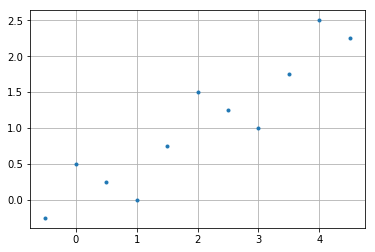

In [6]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
Y = np.array([-0.25, 0.5, 0.25, 0.0, 0.75, 1.5, 1.25, 1.00, 1.75, 2.5, 2.25])

# Plota os pontos e a reta
plt.plot(X, Y, ".") 
plt.grid()
plt.show()

É possível perceber que os pontos parecem crescer linearmente mas também parecem oscilar com período igual a 2. 

Essas características sugerem uma função do tipo $g(x) = a_1x+a_2 \cos(\pi x)$ em que $g_1(x)=x$ e $g_2(x) = cos(\pi x)$.

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
71.5 2.0000000000000018 5.0
36.75 3.5000000000000004
[0.5 0.5]


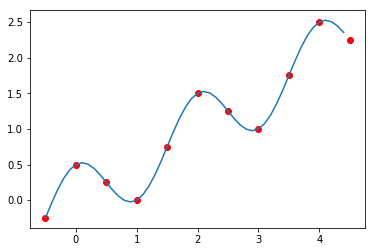

In [7]:
from scipy.linalg import solve

# Calcula os elementos das marizes
g1 = lambda X: X
g2 = lambda X: np.cos(np.pi*X)

print (g1(X))
a11 = np.sum(np.multiply(g1(X),g1(X)))
a12 = np.sum(np.multiply(g1(X),g2(X)))
a21 = a12
a22 = np.sum(np.multiply(g2(X),g2(X)))

print (a11, a12, a22)

b1 = np.sum(np.multiply(Y,g1(X)))
b2 = np.sum(np.multiply(Y,g2(X)))

print (b1,b2)


# Monta e resolve o sistema
A = np.array([[a11, a12],
              [a21, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda X: a[0]*g1(X)+a[1]*g2(X)

# cria pontos (x, y) da reta 
Xr = np.arange(X[0], X[-1], 0.1)
Yr = g(Xr)   

# Plota os pontos e a reta
plt.plot(X, Y, "ro", Xr, Yr, "-") 
plt.show()
